In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model

import seaborn as sns

In [2]:
df = pd.read_csv('./house_data_colombo_cluster1 (1).csv')

In [3]:
df.head(1)

,price,beds,baths,house_size,land_size,0,1,2,3,4,...,29,30,31,32,33,34,35,36,37,38
0,12500000,4,2,1750.0,6.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
featuers_list  = [ 'beds', 'baths', 'house_size', 'land_size', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

In [9]:
rf_results = []
for index, features in enumerate([featuers_list]):
    model = RandomForestRegressor(n_jobs=-1)
    max_scores_param = []
    X_train, X_test, Y_train, Y_test = train_test_split(
        df[features],
        df['price'],
        test_size=0.25,
        random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    rmses = []
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        score = model.score(X_test, Y_test)
        scores.append(score)
        rmses.append(rmse)
        print((rmse, score, n))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmses[scores.index(max(scores))] ))
#     print(max_scores_param)
# ax.legend([
#     'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
# #     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
# #     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
# ])
#     print(features)
#     print(max_scores_param)
    rf_results.append((features, max_scores_param))
    print('#######################################################################################################################')


(5427000.259120438, 0.7480048290622876, 10)
(5369323.704402257, 0.7533326270772693, 20)
(5314567.039427962, 0.7583380290549816, 30)
(5300405.192946861, 0.7596242372677341, 40)
(5356384.306443586, 0.7545200695357807, 50)
(5303474.876007419, 0.759345733625931, 60)
(5298667.557723848, 0.7597818165137902, 70)
(5306456.180540132, 0.759075093967946, 80)
(5298273.925400374, 0.7598175062899021, 90)
(5262717.9300881205, 0.7630303535659079, 100)
(5295693.232486471, 0.760051426359931, 110)
(5252472.288071157, 0.7639521368848905, 120)
(5273926.61415954, 0.7620198694495735, 130)
(5289076.8842467405, 0.7606506270702051, 140)
(5268824.772038124, 0.7624800767609659, 150)
(5290541.019403235, 0.7605180941749321, 160)
(5257691.424710552, 0.7634828043279436, 170)
(5280856.590180949, 0.7613940434770542, 180)
(5266037.742158803, 0.7627312902935554, 190)
(5292083.211582085, 0.7603784559223624, 200)
(5287808.67004568, 0.7607653956350278, 210)
(5256638.481832901, 0.7635775280914111, 220)
(5286968.49929338, 0.7

In [12]:
df.head()

,price,beds,baths,house_size,land_size,0,1,2,3,4,...,29,30,31,32,33,34,35,36,37,38
0,12500000,4,2,1750.0,6.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,29500000,4,4,3510.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19000000,4,3,2850.0,7.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35000000,7,4,1700.0,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29500000,5,4,3500.0,8.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df['h_l_ratio'] = df['house_size'].apply(lambda x: x * 0.0036730945821854912)/ df['land_size']
df['Bed Size'] = df['house_size'] / df['beds']

In [14]:
df_single_story = df[df['h_l_ratio'] <= 1.0]

In [15]:
df_single_story.shape

(3254, 46)

In [16]:
rf_results = []
for index, features in enumerate([featuers_list]):
    model = RandomForestRegressor(n_jobs=-1)
    max_scores_param = []
    X_train, X_test, Y_train, Y_test = train_test_split(
        df_single_story[features],
        df_single_story['price'],
        test_size=0.25,
        random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    rmses = []
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        score = model.score(X_test, Y_test)
        scores.append(score)
        rmses.append(rmse)
        print((rmse, score, n))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmses[scores.index(max(scores))] ))
#     print(max_scores_param)
# ax.legend([
#     'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
# #     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
# #     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
# ])
#     print(features)
#     print(max_scores_param)
    rf_results.append((features, max_scores_param))
    print('#######################################################################################################################')


(5588466.516490962, 0.6822198295448847, 10)
(5581930.803884275, 0.682962682841399, 20)
(5606309.193822314, 0.680187393418558, 30)
(5466096.086339651, 0.6959843009345212, 40)
(5551174.124197487, 0.6864468360123649, 50)
(5510089.909679424, 0.6910708723106087, 60)
(5514228.473873128, 0.6906066319119688, 70)
(5536429.116196477, 0.6881103412651319, 80)
(5491182.005621026, 0.6931874186260907, 90)
(5554753.759853138, 0.6860423205176339, 100)
(5482116.187113645, 0.6941996637393083, 110)
(5481903.07839764, 0.6942234382993955, 120)
(5505250.238347603, 0.6916133167591649, 130)
(5442403.726293593, 0.6986140532105881, 140)
(5507716.4169713445, 0.6913369598411878, 150)
(5513392.306255335, 0.6907004564975925, 160)
(5463106.842394542, 0.6963167241418113, 170)
(5459126.521429575, 0.6967590792358052, 180)
(5509939.37214271, 0.691087752178412, 190)
(5456547.436645327, 0.6970455350633187, 200)
(5465325.244456121, 0.6960700409238043, 210)
(5484914.730161562, 0.6938873705256579, 220)
(5485949.255754706, 0.6

Text(0.5, 1, 'Corretion Matrix for  house')

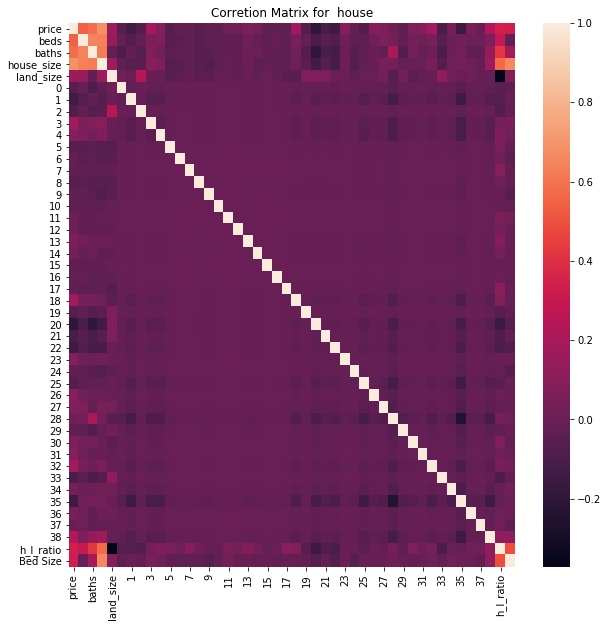

In [17]:
fig,axes = plt.subplots( figsize=(10,10))
sns.heatmap(df.corr())
axes.set_title('Corretion Matrix for  house')

In [32]:
df['beds_bath_ratio'] = df['beds']/df['baths']

In [33]:
features_important =[
    ['beds', 'baths', 'land_size','0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38' ],
    [ 'beds', 'baths','house_size', 'h_l_ratio','0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'],
    [ 'beds', 'baths', 'land_size', 'h_l_ratio', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'],
    [ 'beds', 'baths', 'land_size', 'Bed Size', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'],
    [ 'beds', 'house_size', 'land_size', 'beds_bath_ratio','0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'],
    [ 'beds', 'house_size', 'h_l_ratio', 'beds_bath_ratio', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'],
    [ 'beds', 'land_size', 'h_l_ratio', 'beds_bath_ratio', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'],
    [ 'beds', 'baths', 'house_size', 'h_l_ratio', 'beds_bath_ratio','0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'],
    [ 'beds', 'baths', 'land_size', 'h_l_ratio', 'beds_bath_ratio', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'],
    [ 'beds', 'baths', 'h_l_ratio', 'Bed Size', 'beds_bath_ratio', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']  
]

In [34]:
rf_results = []
for index, features in enumerate(features_important):
    model = RandomForestRegressor(n_jobs=-1)
    max_scores_param = []
    X_train, X_test, Y_train, Y_test = train_test_split(
        df[features],
        df['price'],
        test_size=0.25,
        random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    rmses = []
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        score = model.score(X_test, Y_test)
        scores.append(score)
        rmses.append(rmse)
        print(score, rmse, n, index)
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmses[scores.index(max(scores))] ))
#     print(max_scores_param)
# ax.legend([
#     'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
# #     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
# #     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
# ])
#     print(features)
#     print(max_scores_param)
    rf_results.append((features, max_scores_param))
    print('#######################################################################################################################')


0.7159936199715038 5761396.72352456 10 0
0.7235125937085103 5684619.629168675 20 0
0.7220198735770296 5699944.240138103 30 0
0.7243525545812267 5675978.20473882 40 0
0.7248880769471596 5670461.935517773 50 0
0.7226804366915875 5693167.834174019 60 0
0.7257296853057348 5661781.898130324 70 0
0.7266720994732144 5652046.366089448 80 0
0.7271536369966789 5647065.403309409 90 0
0.7301582024326395 5615886.78303632 100 0
0.7256545596272581 5662557.257440089 110 0
0.7247412865147542 5671974.51728587 120 0
0.7285125692813528 5632985.027660643 130 0
0.7274413128771344 5644087.623205038 140 0
0.7265682504459376 5653119.991895499 150 0
0.7257028695130561 5662058.671537034 160 0
0.7250817937686147 5668465.189455577 170 0
0.7272831695690397 5645724.784843554 180 0
0.7277552277678185 5640836.445244868 190 0
0.7273164182035563 5645380.621336457 200 0
0.7266778955349793 5651986.438465072 210 0
0.7291118181439791 5626764.804826778 220 0
0.7264159349716001 5654694.311217509 230 0
0.7259573629988112 56594

In [38]:
important_features = [ features_important[2], features_important[6], features_important[8]]

In [39]:
df.columns

Index(['price', 'beds', 'baths', 'house_size', 'land_size', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', 'h_l_ratio',
       'Bed Size', 'beds_bath_ratio'],
      dtype='object')

In [43]:
cols = ['price', 'beds', 'baths', 'house_size', 'land_size', 'Bed Size', 'beds_bath_ratio', 'h_l_ratio']

Text(0.5, 1, 'Corretion Matrix for  house')

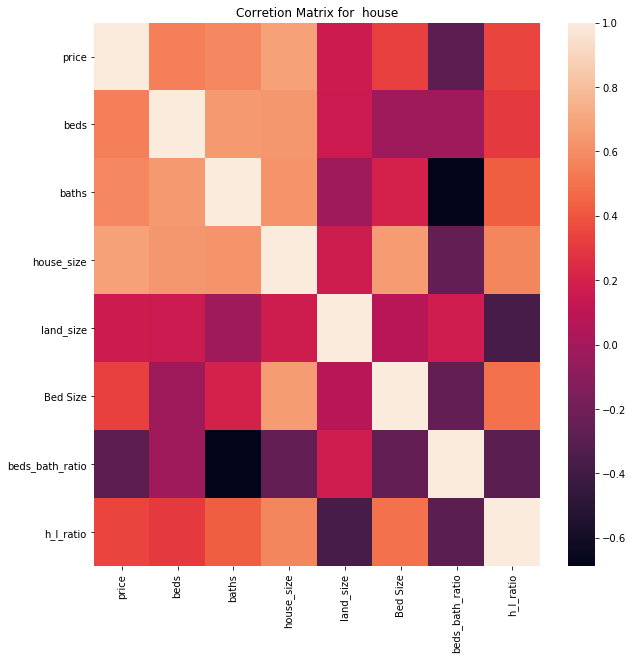

In [44]:
fig,axes = plt.subplots( figsize=(10,10))
sns.heatmap(df[cols].corr())
axes.set_title('Corretion Matrix for  house')

<h1>Try to find outliers 

In [46]:
from scipy.stats import norm
from scipy import stats

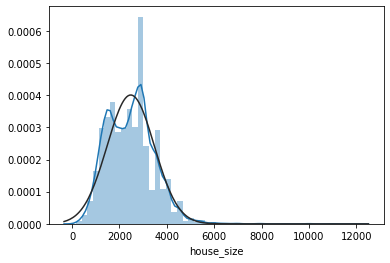

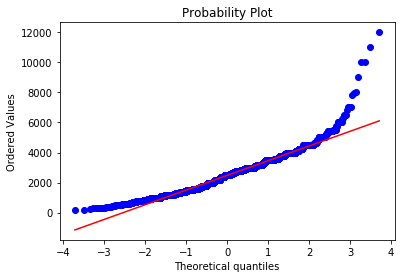

In [47]:
sns.distplot(df['house_size'] ,fit=norm)
fig = plt.figure()
res = stats.probplot(df['house_size'], plot =plt)

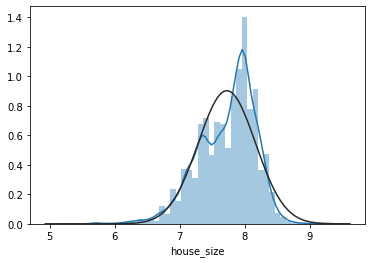

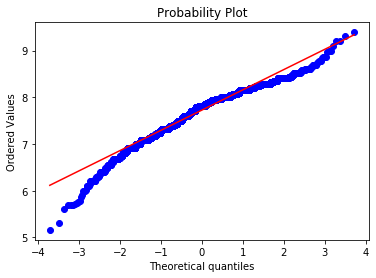

In [50]:
sns.distplot(np.log(df['house_size']) ,fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(df['house_size']), plot =plt)

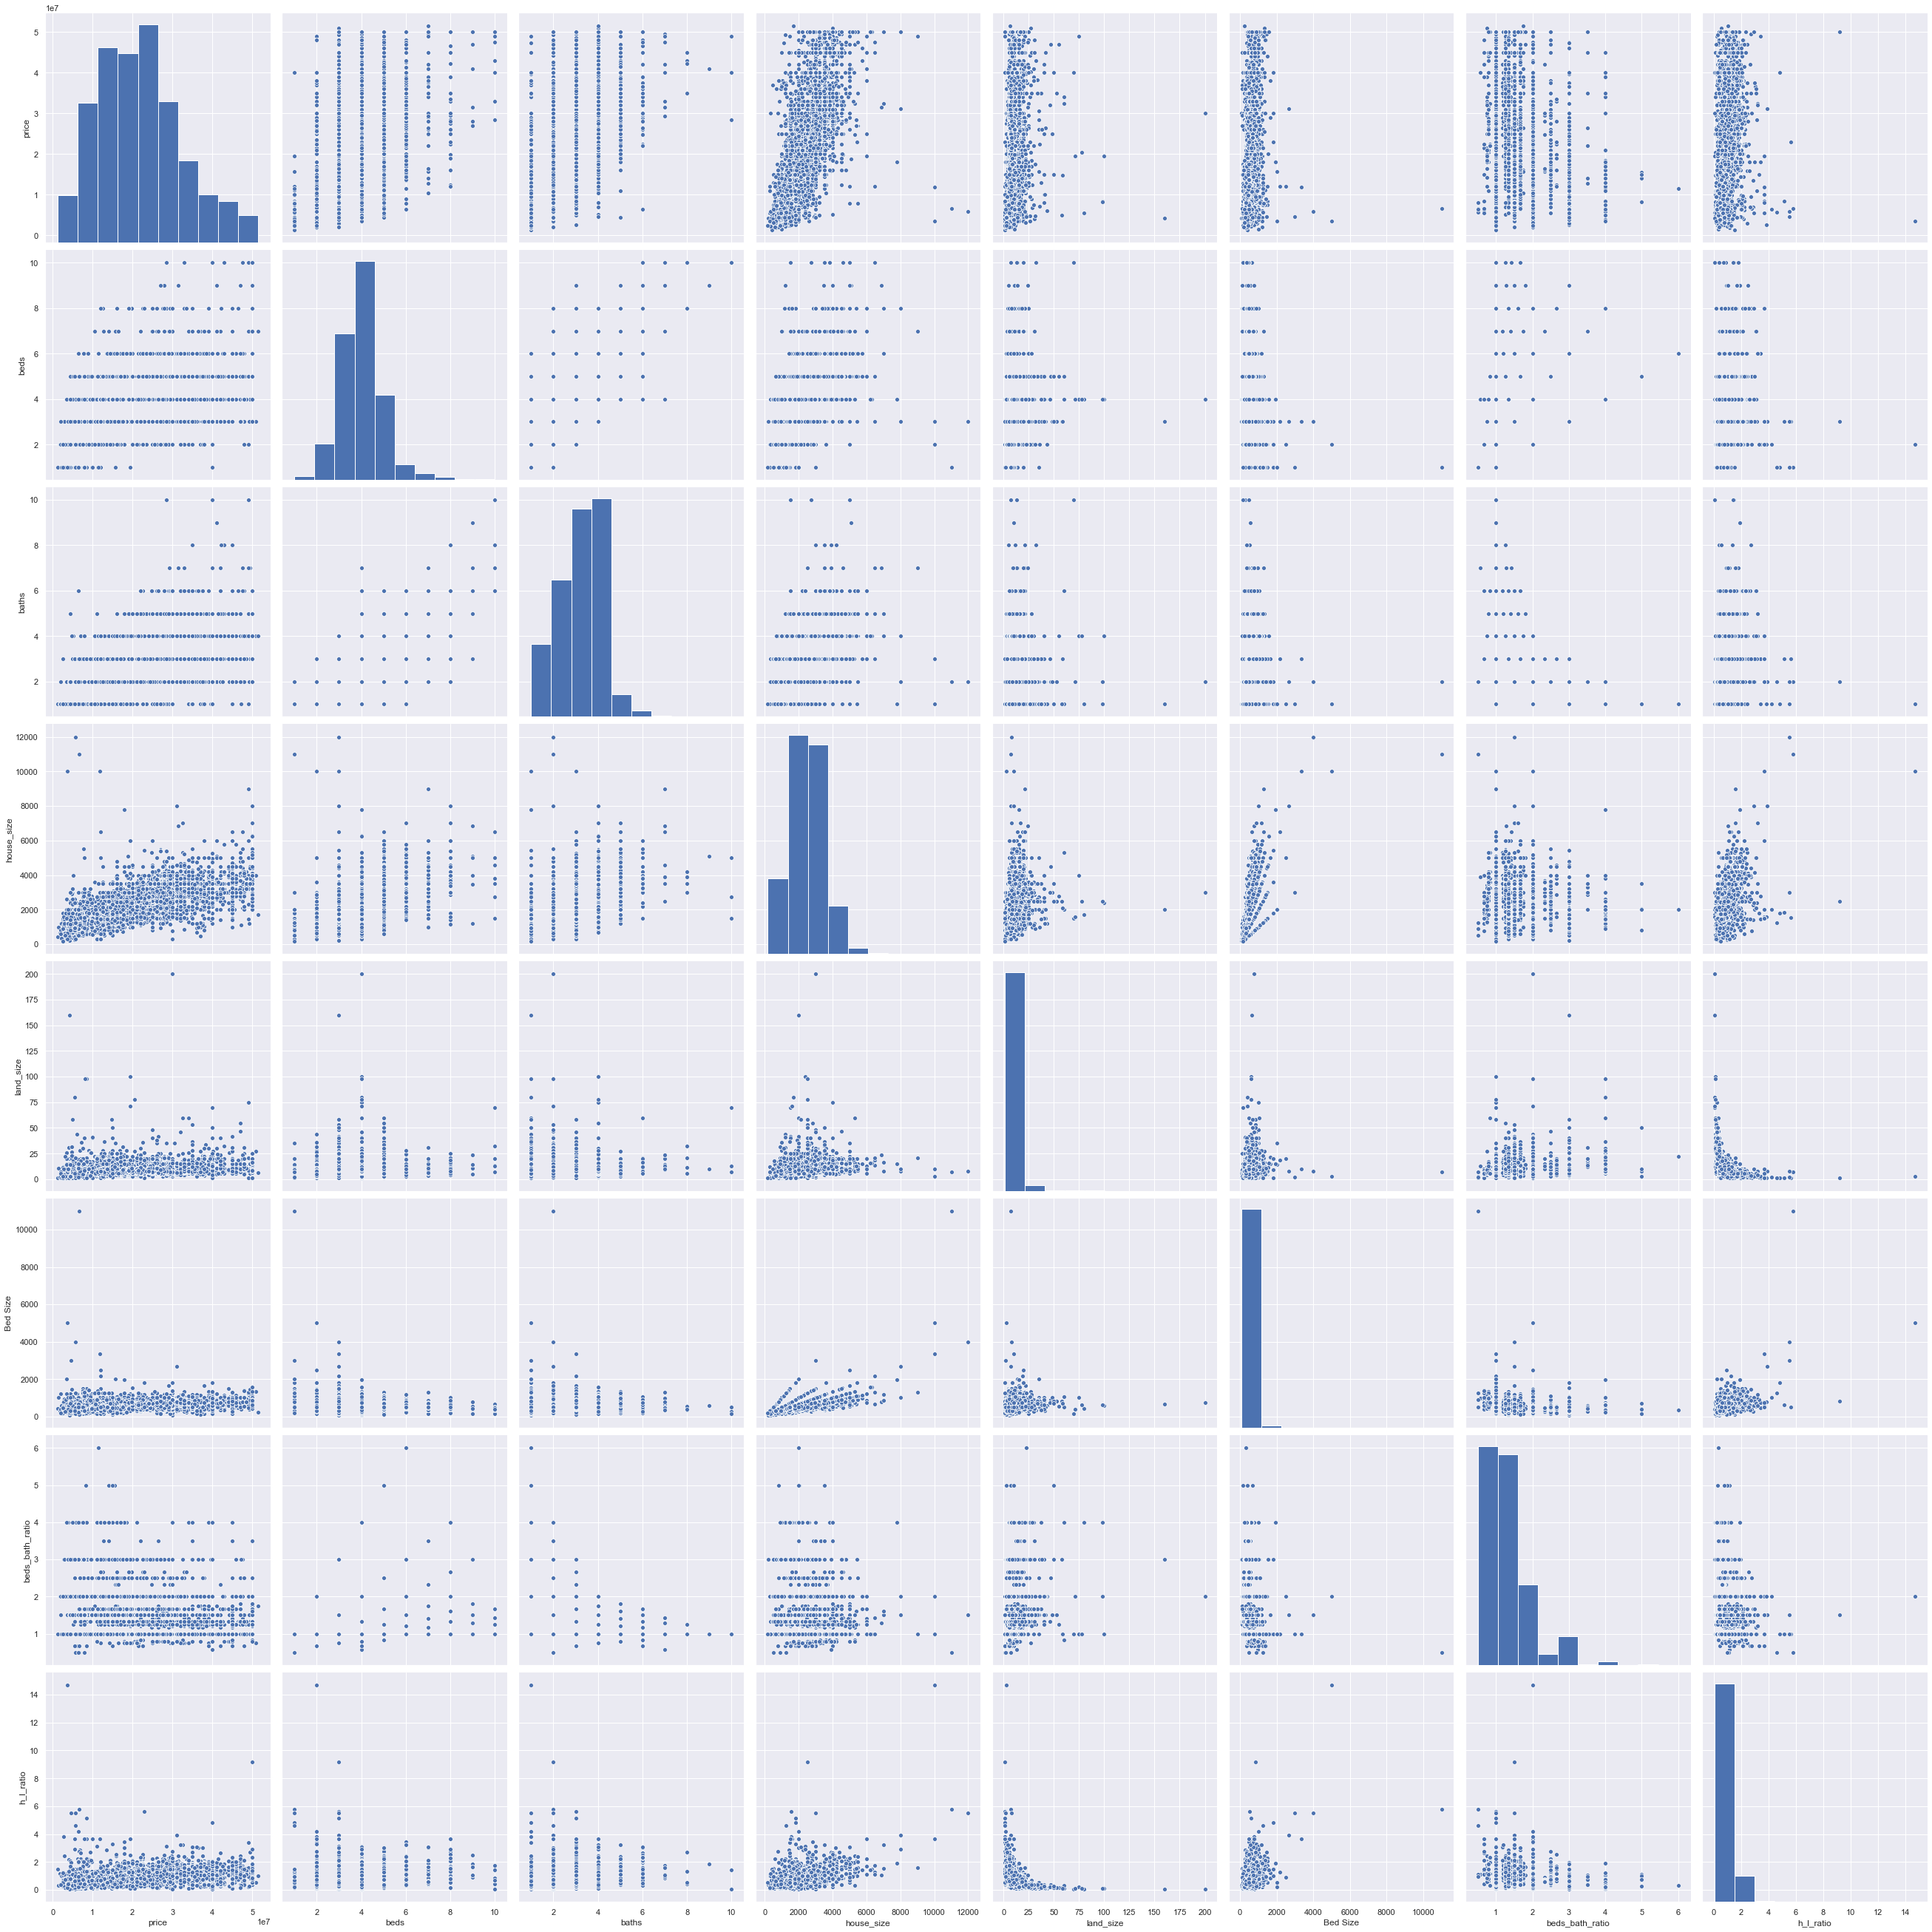

In [53]:
sns.set()

sns.pairplot(df[cols], size = 4.5)

In [54]:
df['price'].describe()

count    6.813000e+03
mean     2.184571e+07
std      1.064403e+07
min      1.300000e+06
25%      1.370000e+07
50%      2.100000e+07
75%      2.850000e+07
max      5.150000e+07
Name: price, dtype: float64

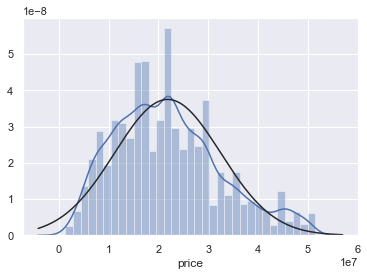

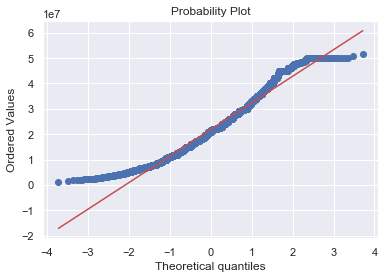

In [57]:
sns.distplot(df['price'] ,fit=norm)
fig = plt.figure()
res = stats.probplot(df['price'], plot =plt)

<h1>Segmenting Instances by Price

In [68]:
print('Price Below 2 crore : ' + str(df.query('price < 2.0e7').shape[0]))
print('Price Between  2 crore to 4 crore : ' + str(df.query('price >= 2.0e7 & price < 4.0e7').shape[0]))
print('Price Between  2 crore to 4 crore : ' + str(df.query('price > 4.0e7' ).shape[0]))

Price Below 2 crore : 3152
Price Between  2 crore to 4 crore : 3156
Price Between  2 crore to 4 crore : 433


In [69]:
df_range_1 = df.query('price < 2.0e7')
df_range_2 = df.query('price >= 2.0e7 & price < 4.0e7')
df_range_3 = df.query('price > 4.0e7' )

<h1>Try Import features for range 1

In [70]:
rf_results = []
for index, features in enumerate(features_important):
    model = RandomForestRegressor(n_jobs=-1)
    max_scores_param = []
    X_train, X_test, Y_train, Y_test = train_test_split(
        df_range_1[features],
        df_range_1['price'],
        test_size=0.25,
        random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    rmses = []
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        score = model.score(X_test, Y_test)
        scores.append(score)
        rmses.append(rmse)
        print(score, rmse, n, index)
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmses[scores.index(max(scores))] ))
#     print(max_scores_param)
# ax.legend([
#     'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
# #     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
# #     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
# ])
#     print(features)
#     print(max_scores_param)
    rf_results.append((features, max_scores_param))
    print('#######################################################################################################################')


0.572626875559958 2903544.067107857 10 0
0.5831364562162542 2867621.1567040123 20 0
0.5827531796838734 2868939.141199509 30 0
0.5856413470475659 2858992.552464704 40 0
0.5832625758170451 2867187.332974636 50 0
0.5802711825378453 2877459.4466940667 60 0
0.5869001527514852 2854646.494274595 70 0
0.584726130809224 2862148.216199305 80 0
0.5812670837069841 2874043.708976598 90 0
0.5861503424470782 2857236.0292033106 100 0
0.5866520571507495 2855503.5739112925 110 0
0.5826475930836035 2869302.118643538 120 0
0.5838732506106634 2865085.8167225155 130 0
0.587095874642569 2853970.165043276 140 0
0.5880831437412162 2850556.14873263 150 0
0.5912241160875196 2839667.2381350975 160 0
0.5861070460391089 2857385.48543597 170 0
0.5866084989466335 2855654.0250422033 180 0
0.5884031114253745 2849448.809925848 190 0
0.5870649800841161 2854076.933774098 200 0
0.5880670450293402 2850611.851519564 210 0
0.5855291714250117 2859379.521053888 220 0
0.5895587398526669 2845445.8415651163 230 0
0.587428679942971

In [71]:
rf_results = []
for index, features in enumerate(features_important):
    model = RandomForestRegressor(n_jobs=-1)
    max_scores_param = []
    X_train, X_test, Y_train, Y_test = train_test_split(
        df_range_2[features],
        df_range_2['price'],
        test_size=0.25,
        random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    rmses = []
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        score = model.score(X_test, Y_test)
        scores.append(score)
        rmses.append(rmse)
        print(score, rmse, n, index)
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmses[scores.index(max(scores))] ))
#     print(max_scores_param)
# ax.legend([
#     'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
# #     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
# #     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
# ])
#     print(features)
#     print(max_scores_param)
    rf_results.append((features, max_scores_param))
    print('#######################################################################################################################')


0.4955940243052888 3728311.1116170003 10 0
0.4981186467751525 3718969.048035375 20 0
0.4970168635427678 3723048.9479580233 30 0
0.4992843610416248 3714647.5330616334 40 0
0.5050992196530655 3693015.266698136 50 0
0.5064220729457121 3688076.310706874 60 0
0.5074563118682065 3684210.3028317676 70 0
0.5036323629121746 3698484.157111599 80 0
0.5043058724501959 3695974.112412569 90 0
0.507670563831683 3683408.9169152947 100 0
0.5140503650625821 3659465.5560285975 110 0
0.5061396402604905 3689131.3460637257 120 0
0.5087450187979186 3679387.403717017 130 0
0.508390476178842 3680714.885793104 140 0
0.5050920146952957 3693042.1487755687 150 0
0.507054263175676 3685713.651491906 160 0
0.50966434830037 3675943.0077011595 170 0
0.506521162156814 3687706.0886046407 180 0
0.510302941594621 3673548.5281798346 190 0
0.5096740520600412 3675906.6340009505 200 0
0.5105190659068601 3672737.791465035 210 0
0.5093235523185571 3677220.223629504 220 0
0.5124073050269754 3665646.904153051 230 0
0.5059201680403